# Predicting Employee Churn with Machine Learning

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('employee_data.csv')

In [3]:
#exploring the first 10 rows of the data
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Data Preprocessing

In [4]:
#Exploring the variables

In [5]:
df.shape

(14999, 10)

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Move the reponse variable 'quit' to the front of the table
front = df['quit']

# drop(colume name list , axis: 0  for index 1 for columns, inplace means permanent change)
df.drop(labels=['quit'], axis=1,inplace = True)

# insert( insert column location, column to be inserted , values)
df.insert(0, 'quit', front)

df.head()

,quit,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [8]:
#checking if null values are present in any of the columns
df.isna().sum()

quit                     0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
#checking if the attributes are of the correct datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quit                   14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
#data statistics 
df.describe()

,quit,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
#Exploring the quit column (people who quit the job or not - 0 -> did not quit, 1 -> quit the job)
df['quit'].value_counts()

0    11428
1     3571
Name: quit, dtype: int64

In [12]:
df.groupby('quit').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
quit,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [13]:
churn = df['quit'].value_counts()
churn_rate = churn[1]/df.shape[0]
churn_rate

0.2380825388359224

In [14]:
df.groupby('salary').mean()

,quit,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
salary,,,,,,,,
high,0.066289,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.058205
low,0.296884,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.009021
medium,0.204313,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.028079


### Quick Observations 
(i). The average satisfaction level for people who stayed in the company (66%) is greater than those who left (44%).\
(ii). The company had a churn rate of approximately 24%. \
(iii). Average monthly hours spent is higher for those who left compared to those who stayed. This could mean that employees who were getting overworked ended up leaving the company. \
(iv). The average promotion for employees who stayed at the company is more compared to those who left. This could mean that employees who got promoted in the last five years are less likely to leave the company or employees left the company for a higher position elsewhere. \
(v). The churn rate of employees is higher for low salaried employees. 

## Exploratory Data Analysis 


#### Churn By Department

Text(0.5, 1.0, 'Departmentwise Employee Churn')

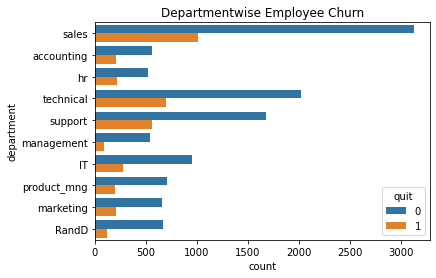

In [15]:
sns.countplot(y='department', hue='quit', data=df).set_title('Departmentwise Employee Churn')

Departments Sales, Technical, and Support are the top 3 departments in terms of employee quit rate. The Management department had the least employee churn count. 

### Churn by Salary 

<AxesSubplot:xlabel='salary'>

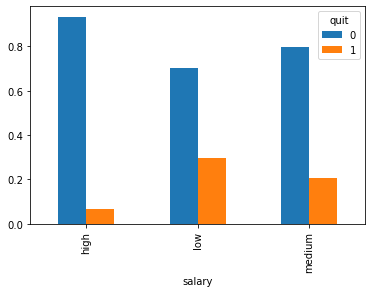

In [16]:
crosstab=pd.crosstab(df.salary, df.quit)
crosstab.div(crosstab.sum(1).astype(float), axis=0).plot(kind='bar')

Proportion of employees who quit their jobs appears to be the highest in lower salaried employees. On the other hand, proprtion employees who quit despite having a high salary is very low. This implies that employees with low salaries tend to leave the company for a better opportunity elsewhere. 

### Churn by Years at the Company

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

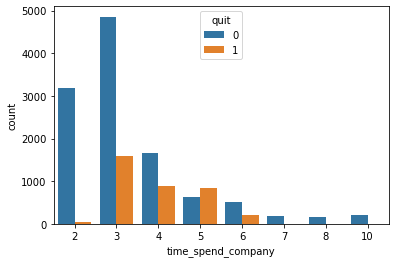

In [17]:
sns.countplot(data= df, x='time_spend_company', hue='quit')

The count plot above shows that employees tend to quit between 3 and 5 years at the the company. Employees before their 2 year and after the 6th year at the company do not tend to leave the company and continue their work there. Between 4 and 5 years in when the number of employees who quit is the highest. 

### Distribution of the numerical variables 

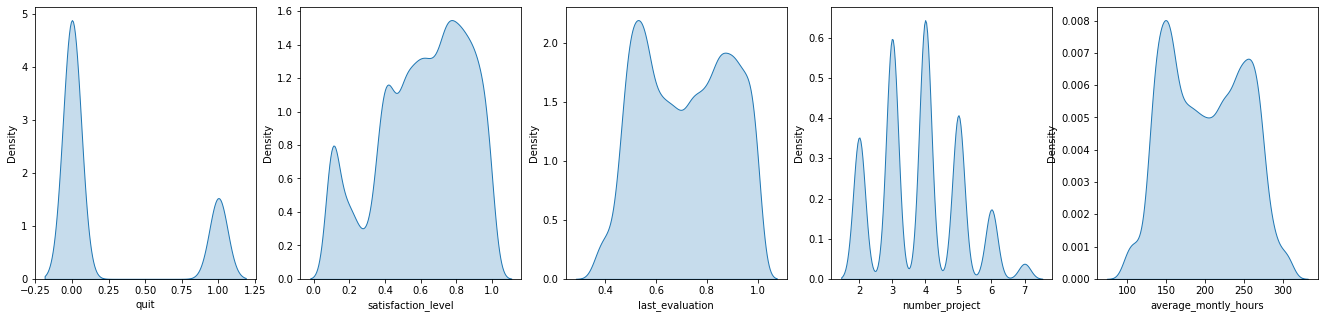

In [18]:
fig, axs = plt.subplots(1,5, figsize=(23,5))
columns = df.columns[0:5]
for i in range(5): 
    sns.kdeplot(x= columns[i], data=df, ax=axs[i], shade=True)

Employees who had very low satisfaction level and very high satisfaction seem to have left the company very often. \
Employees who had very low evaluation score and very high evaluation score seem to have left the company very often. \
Employees who have very low average monthly hours (underworked) and very high average monthly hours (overworked) left the company very often.

## Correlation Heatmap 

Text(0.5, 1.0, 'Correlation Heatmap between the Attributes')

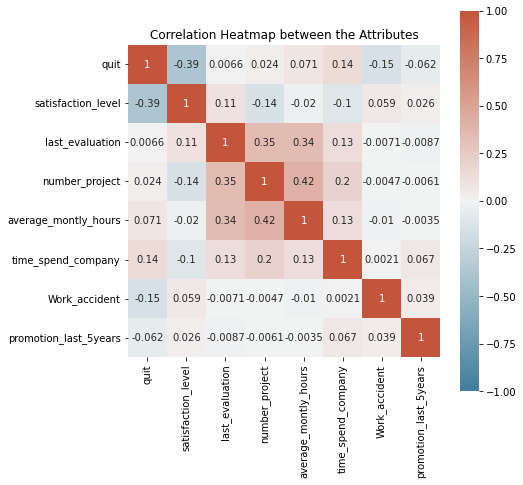

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
cmap= sns.diverging_palette(230,20,as_cmap=True)
#pearson_corr_coff
corr_p = df.corr()
sns.heatmap(corr_p, square=True, cmap=cmap, vmin= -1, vmax = 1, annot=True).set_title('Correlation Heatmap between the Attributes')

Weak Positive Correlation: \
Evaluation and Number of Projects - 0.35
Evaluation and Average Monthly Hours - 0.35
Number of projects and Average Monthly Hours - 0.42

Weak Negative Correlation: \
Satisfaction and Quit - (-0.39)

The correlation values are not very significant which makes it difficult to find out the most important attributes. Thus, a Supervised Recursive Feature Selection is performed to identify the influential features and to increase the model accuracy. 

## Feature Transformation - Categorical to Numerical 

In [20]:
#creating dummy variables for the categories salary and department 
salary = pd.get_dummies(data=df['salary'], prefix='sal')
department = pd.get_dummies(data=df['department'], prefix='dep')
df= df.join(salary)
df= df.join(department)

In [21]:
#dropping the department and salary columns 
cols = ['department', 'salary']
df.drop(cols, axis=1, inplace=True)

### Separating the dependent and independent variables for model fitting

In [22]:
X = df.drop('quit', axis=1)
y = df['quit']

### Feature Selection for deciding the best attributes to predict employee churn 

In [23]:
#Applying Recurive Feature Selection 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 


model = LogisticRegression() 
#selecting the 10 most important features
recursive_feature = RFE(model, n_features_to_select=10, step=1)
rfe = recursive_feature.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True  True False False  True
 False  True  True False False False False False]
[ 1  1  3 11  1  1  1  1  1  2  9  1  6  1  1  7 10  8  5  4]


The support array shows the 10 most important features which are marked as True and the ranking array marks these important features as 1. 

In [24]:
#Extracting the important features 
new_cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years','sal_high', 'sal_low','dep_RandD', 'dep_hr', 'dep_management']
len(new_cols)
X = df[new_cols]

### Identifying Clusters of Employees who quit based on satisfaction and evaluation

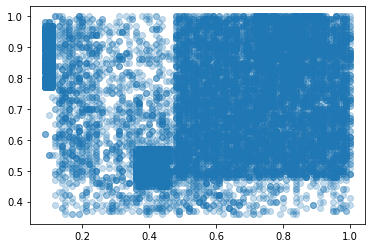

In [25]:
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df,alpha=0.25)

## K Means Algorithm with 3 Clusters

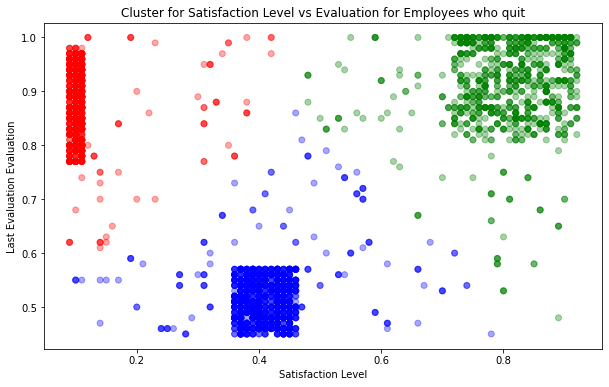

In [26]:
from sklearn.cluster import KMeans 
emp_quit = df.loc[df['quit'] == 1][['satisfaction_level', 'last_evaluation']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(emp_quit)
colors = ['red' if color == 0 else 'green' if color == 2 else 'blue' for color in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.quit==1],
            alpha=0.35, color=colors)
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation Evaluation")
plt.title("Cluster for Satisfaction Level vs Evaluation for Employees who quit")
plt.show()

The above scatterplot shows three different clusters for employees who quit their jobs from the company based on their satisfaction level and last evaluation. The three clusters are explained further below - 

Cluster 1 Red \
    a. Satisfaction Level- (0 to 0.2) \
    b. Evaluation - (0.75 to 1) \
The employees belonging to this cluster appear to be working very hard but have a very low satisfaction level. So, they are overworked and unhappy.

Cluster 2 Blue   
    a. Satisfaction Level- (0.35 to 0.45) \
    b. Evaluation- (0.3 to 0.58)\
The employees belonging to this cluster appear to be not working very hard but have a very low satisfaction level. So, they are underperforming and unhappy.

Cluster 3 Green \
    a. Satisfaction Level- (0.7 to 1)\
    b. Evaluation- (0.8 to 1)
    
The employees belonging to this cluster appear to be hardworking and have a high satisfaction level. So, they are hardworking and happy. They are an ideal candidate for a company and they must have received a better opportunity elsewhere which made them leave.

## Splitting the Data for Testing and Training 


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

### Fitting the models

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression()

In [29]:
logistic_model.fit(X_train, y_train)
logistic_score_train = logistic_model.score(X_train, y_train)
print(f"The accuracy score of Logistic Regression on training data is {logistic_score_train}.")

The accuracy score of Logistic Regression on training data is 0.7694807900658388.


In [30]:
logistic_score_test = logistic_model.score(X_test, y_test)
print(f"The accuracy score of Logistic Regression on test data is {logistic_score_test}.")

The accuracy score of Logistic Regression on test data is 0.76.


#### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
decision_score_train = decision_tree_model.score(X_train, y_train)
print(f"The accuracy score of Decision Tree Classifier on training data is {decision_score_train}.")

The accuracy score of Decision Tree Classifier on training data is 0.9969164097008084.


In [33]:
decision_score_test = decision_tree_model.score(X_test, y_test)
print(f"The accuracy score of Logistic Regression on test data is {decision_score_test}.")

The accuracy score of Logistic Regression on test data is 0.972.


#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
rf_score_train = random_forest_model.score(X_train, y_train)
print(f"The accuracy score of Random Forest Classifier on training data is {rf_score_train}.")

The accuracy score of Random Forest Classifier on training data is 0.9968330694224519.


In [37]:
rf_score_test = random_forest_model.score(X_test, y_test)
print(f"The accuracy score of Random Forest on test data is {rf_score_test}.")

The accuracy score of Random Forest on test data is 0.9826666666666667.


#### Support Vector Machine 

In [38]:
from sklearn.svm import SVC

In [39]:
svc_model = SVC(probability=True)
svc_model.fit(X_train,y_train)

SVC(probability=True)

In [40]:
svc_score_train = svc_model.score(X_train, y_train)
print(f"The accuracy score of Support Vector Classifier on training data is {svc_score_train}.")

The accuracy score of Support Vector Classifier on training data is 0.9070755896324694.


In [41]:
svc_score_test = svc_model.score(X_test, y_test)
print(f"The accuracy score of Support Vector Classifier on test data is {svc_score_test}.")

The accuracy score of Support Vector Classifier on test data is 0.9073333333333333.


### Model Evaluation 

Constructing a confusion matrix for all the classifier models used

##### Logistic Regression 

In [42]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.48      0.24      0.32       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000



Text(0.5, 1.0, 'Logistic Regression')

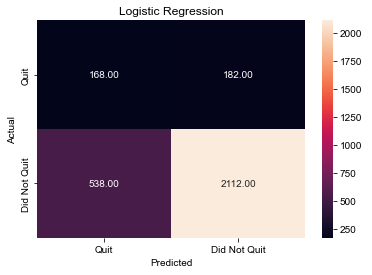

In [43]:
y_pred = logistic_model.predict(X_test)
from sklearn.metrics import confusion_matrix
logistic_cm = confusion_matrix(y_pred, y_test, labels = [1,0])
sns.heatmap(logistic_cm, annot=True, fmt='.2f',xticklabels = ["Quit", "Did Not Quit"] , yticklabels = ["Quit", "Did Not Quit"])
sns.set(rc={'figure.figsize':(3,3)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression')

##### Decision Tree

In [44]:
print(classification_report(y_test, decision_tree_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2294
           1       0.93      0.95      0.94       706

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



Text(0.5, 1.0, 'Decision Tree Classifier')

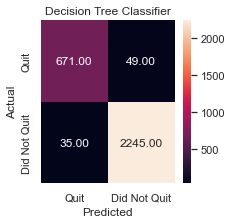

In [45]:
y_pred = decision_tree_model.predict(X_test)
from sklearn.metrics import confusion_matrix
decision_cm = confusion_matrix(y_pred, y_test, labels = [1,0])
sns.heatmap(decision_cm, annot=True, fmt='.2f',xticklabels = ["Quit", "Did Not Quit"] , yticklabels = ["Quit", "Did Not Quit"])
sns.set(rc={'figure.figsize':(3,3)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Classifier')

##### Random Forest 

In [46]:
print(classification_report(y_test, random_forest_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.96      0.96      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



Text(0.5, 1.0, 'Random Forest Classifier')

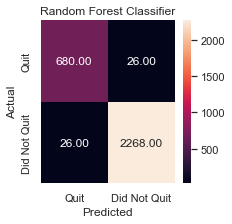

In [47]:
y_pred = random_forest_model.predict(X_test)
from sklearn.metrics import confusion_matrix
random_f_cm = confusion_matrix(y_pred, y_test, labels = [1,0])
sns.heatmap(random_f_cm, annot=True, fmt='.2f',xticklabels = ["Quit", "Did Not Quit"] , yticklabels = ["Quit", "Did Not Quit"])
sns.set(rc={'figure.figsize':(3,3)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Classifier')

##### Support Vector 

In [48]:
print(classification_report(y_test, svc_model.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2294
           1       0.78      0.84      0.81       706

    accuracy                           0.91      3000
   macro avg       0.87      0.88      0.87      3000
weighted avg       0.91      0.91      0.91      3000



Text(0.5, 1.0, 'Support Vector Classifier')

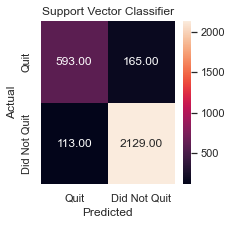

In [49]:
y_pred = svc_model.predict(X_test)
from sklearn.metrics import confusion_matrix
svc_cm = confusion_matrix(y_pred, y_test, labels = [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Quit", "Did Not Quit"] , yticklabels = ["Quit", "Did Not Quit"])
sns.set(rc={'figure.figsize':(3,3)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Support Vector Classifier')

### ROC Curve

A Reciver operating characteristic (ROC) curve is used to compare the performance of the different classifiers used. The ROC curve is plotted as True Positive Rate vs False Positive Rate and the classifier with the curve that shows a high True positive rate i.e. closer to the top left corner is generally considered as a classifier with better performance. 

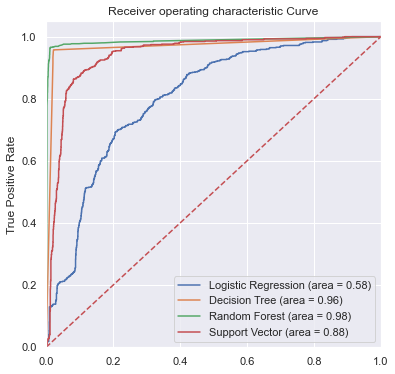

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

#logisitc regression 
logistic_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
fpr,tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])

#decision tree
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_model.predict(X_test))
d_fpr,d_tpr, d_thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:,1])

#random forest 
random_f_roc_auc = roc_auc_score(y_test, random_forest_model.predict(X_test))
r_f_fpr, r_f_tpr, r_f_thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:,1])

#support vector 
svc_roc_auc = roc_auc_score(y_test, svc_model.predict(X_test))
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])

plt.figure()
sns.set(rc={'figure.figsize':(6,6)})
plt.plot(fpr,tpr, label='Logistic Regression (area = %0.2f)' %logistic_roc_auc)
plt.plot(d_fpr, d_tpr, label='Decision Tree (area = %0.2f)' %decision_tree_roc_auc)
plt.plot(r_f_fpr,r_f_tpr, label='Random Forest (area = %0.2f)' %random_f_roc_auc)
plt.plot(svc_fpr,svc_tpr, label='Support Vector (area = %0.2f)' %svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Here, from the ROC curve, we can see that Random Forest classifier is the best performing classifier model and it is the furthest from the red dotted line and closest to the top left corner with the highest true positive rate. 

### Cross Validation 

K-fold Cross validation is then performed to check if the Random Forest classifier overfits the dataset. Here, k=10 is used to train the Random Forest model. 

In [51]:
from sklearn import model_selection 
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
cv_model = RandomForestClassifier()
results = model_selection.cross_val_score(cv_model, X_train, y_train, cv=kfold, scoring='accuracy')
cv_mean = results.mean()
print(f"Average accuracy of 10-fold cross-validation is {cv_mean}.")

Average accuracy of 10-fold cross-validation is 0.9817482624409231.


The average accuracy with cross validation is still very close to the accuracy of Random Forest classifier model.

### Percent Influence of Important Features ( employee quits or not )


In [52]:
importance = random_forest_model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}    -> {:.2f}%'.format(new_cols[index], (importance[index] *100.0)))

satisfaction_level    -> 50.09%
time_spend_company    -> 26.87%
last_evaluation    -> 18.77%
Work_accident    -> 1.47%
sal_low    -> 1.05%
sal_high    -> 0.71%
dep_RandD    -> 0.31%
dep_hr    -> 0.28%
dep_management    -> 0.24%
promotion_last_5years    -> 0.21%


The Random Forest Classification model shows the important features and their influence on employee churn with the feature with highest influence at the top (descending order).  